# Análise de Dados de Tráfego de Rede

## Introdução
Este notebook explora os dados de tráfego de rede para detecção de anomalias.

The dataset consists of the following columns:

SourceIP: Source IP address of network traffic.
Destination IP: Destination IP address of network traffic.
SourcePort: Source port number.
DestinationPort: Destination port number.
Protocol: Network protocol used.
BytesSent: Number of bytes sent in the network communication.
BytesReceived: Number of bytes received in the network communication.
PacketsSent: Number of packets sent.
PacketsReceived: Number of packets received.
Duration: Duration of the network communication.
Additionally, there is a binary target variable:

IsAnomaly: 0 for regular network traffic, 1 for anomalous network traffic (introduced for demonstration purposes).

USAGE:
This dataset is intended for research and experimentation in the field of network security and anomaly detection. It can be used to train and evaluate machine learning models for identifying network anomalies.

Acknowledgments:
The dataset was created for educational and illustrative purposes and does not represent real-world network traffic data. It was generated using synthetic data generation techniques.

Notes:
This dataset is synthetic and is not representative of real-world network traffic.
Anomalies have been introduced for demonstration purposes.
Use this dataset responsibly and ensure that any use aligns with ethical considerations and legal regulations.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregamento e Análise Inicial dos Dados
1. Carregamento dos dados brutos.
2. Visualização das primeiras linhas do dataset.
3. Estatísticas descritivas básicas.

In [4]:
df = pd.read_csv("drive/MyDrive/Projects/NetWatch/synthetic_network_traffic.csv")

In [5]:
df.head()

SourceIP  DestinationIP  SourcePort  DestinationPort  Protocol  BytesSent  \
0  0.496714      -0.138264    0.647689         1.523030 -0.234153  -0.234137   
1 -0.463418      -0.465730    0.241962        -1.913280 -1.724918  -0.562288   
2  1.465649      -0.225776    0.067528        -1.424748 -0.544383   0.110923   
3 -0.601707       1.852278   -0.013497        -1.057711  0.822545  -1.220844   
4  0.738467       0.171368   -0.115648        -0.301104 -1.478522  -0.719844   

   BytesReceived  PacketsSent  PacketsReceived  Duration  IsAnomaly  
0       1.579213     0.767435        -0.469474  0.542560          0  
1      -1.012831     0.314247        -0.908024 -1.412304          0  
2      -1.150994     0.375698        -0.600639 -0.291694          0  
3       0.208864    -1.959670        -1.328186  0.196861          0  
4      -0.460639     1.057122         0.343618 -1.763040          0

In [6]:
df.describe()

SourceIP   DestinationIP      SourcePort  DestinationPort  \
count  1000000.000000  1000000.000000  1000000.000000   1000000.000000   
mean        -0.000645        0.000899       -0.002857         0.001966   
std          1.000721        0.999597        1.000583         1.000004   
min         -4.980146       -4.841791       -4.829436        -4.644419   
25%         -0.675493       -0.672789       -0.679471        -0.672742   
50%         -0.000708       -0.000433       -0.003061         0.001888   
75%          0.672675        0.676014        0.670509         0.676370   
max          5.032374        4.984215        4.565550         4.748345   

             Protocol       BytesSent   BytesReceived     PacketsSent  \
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000   
mean        -0.000958       -0.001099        0.001715        0.000153   
std          0.999299        1.000560        1.000138        0.999976   
min         -4.950266       -4.630858       -4.462969       -4.564944   
25%         -0.675323       -0.676730       -0.671568       -0.674591   
50%         -0.000974       -0.001224        0.002324        0.000994   
75%          0.671899        0.674718        0.677180        0.675133   
max          4.920315        5.220045        5.033805        4.827623   

       PacketsReceived        Duration       IsAnomaly  
count   1000000.000000  1000000.000000  1000000.000000  
mean          0.001019       -0.000832        0.005000  
std           0.999260        0.999992        0.070534  
min          -5.195261       -4.625258        0.000000  
25%          -0.673667       -0.676727        0.000000  
50%           0.001513       -0.000485        0.000000  
75%           0.675576        0.673657        0.000000  
max           4.795172        4.913122        1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   SourceIP         1000000 non-null  float64
 1   DestinationIP    1000000 non-null  float64
 2   SourcePort       1000000 non-null  float64
 3   DestinationPort  1000000 non-null  float64
 4   Protocol         1000000 non-null  float64
 5   BytesSent        1000000 non-null  float64
 6   BytesReceived    1000000 non-null  float64
 7   PacketsSent      1000000 non-null  float64
 8   PacketsReceived  1000000 non-null  float64
 9   Duration         1000000 non-null  float64
 10  IsAnomaly        1000000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 83.9 MB


<Axes: >

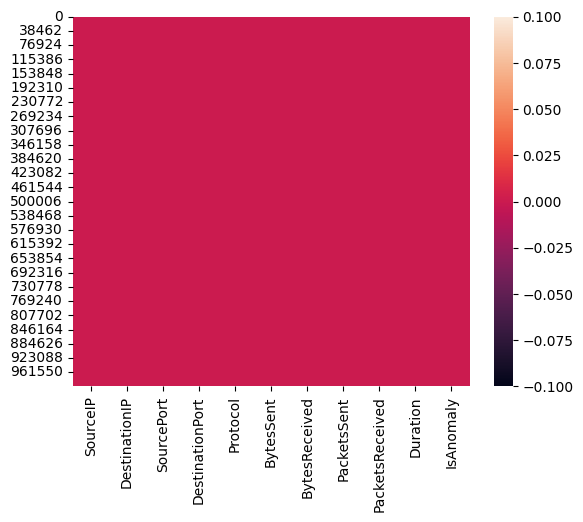

In [8]:
sns.heatmap(df.isnull())

In [9]:
sns.pairplot(df)
plt.show()

In [42]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 20.5 MB/s eta 0:00:00


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tpot import TPOTClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import autokeras as ak
import pandas as pd
from sklearn.model_selection import train_test_split

In [47]:
class TrainingData(object):
  def __init__(self, data, target_column, epochs, trials):
    self.data = data
    self.target_column = target_column
    self.epochs = epochs
    self.trials = trials

  def preprocess_data(self):
    X = self.data.drop(columns=[self.target_column])
    y = self.data[self.target_column]

    # Tratamento de valores ausentes
    imputer = SimpleImputer(strategy='mean')
    X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # Padronização dos dados
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

    self.X_scaled = X_scaled
    self.y = y

    return X_scaled, y

  def training_data(self):
    X_train, X_test, y_train, y_test = train_test_split(self.X_scaled, self.y, test_size=0.2, random_state=42)

    # Inicializar e treinar o classificador Auto-Keras
    clf = ak.StructuredDataClassifier(max_trials=self.trials)  # Escolha o número de tentativas
    clf.fit(X_train, y_train, epochs=self.epochs)

    # Avaliar o modelo
    print(clf.evaluate(X_test, y_test))

  def train(self):
    self.preprocess_data()
    self.training_data()

In [48]:
print(TrainingData(df, 'IsAnomaly').train())

Trial 1 Complete [00h 08m 04s]
val_accuracy: 0.995018720626831

Best val_accuracy So Far: 0.995018720626831
Total elapsed time: 00h 08m 04s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
True              |True              |structured_data_block_1/normalize
False             |False             |structured_data_block_1/dense_block_1/use_batchnorm
2                 |2                 |structured_data_block_1/dense_block_1/num_layers
32                |32                |structured_data_block_1/dense_block_1/units_0
0                 |0                 |structured_data_block_1/dense_block_1/dropout
128               |32                |structured_data_block_1/dense_block_1/units_1
0                 |0                 |classification_head_1/dropout
adam              |adam              |optimizer
0.001             |0.001             |learning_rate

Epoch 1/5
 5965/20000 [=======>......................] - ETA: 42s - loss: 0.0350 - accuracy: 0.9944

KeyboardInterrupt: ignored

In [13]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=3cbc02d490e7b26768b6ed9e03b5dd6e93a854fa726ffc4fc6b81bf92a147b83
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [28]:
df

SourceIP  DestinationIP  SourcePort  DestinationPort  Protocol  \
0       0.496714      -0.138264    0.647689         1.523030 -0.234153   
1      -0.463418      -0.465730    0.241962        -1.913280 -1.724918   
2       1.465649      -0.225776    0.067528        -1.424748 -0.544383   
3      -0.601707       1.852278   -0.013497        -1.057711  0.822545   
4       0.738467       0.171368   -0.115648        -0.301104 -1.478522   
...          ...            ...         ...              ...       ...   
999995  0.002725      -0.638022    0.840857         1.306959 -0.992010   
999996 -0.830555      -0.545716   -1.130178         0.021732 -0.565860   
999997  0.047510      -1.310967    0.173328        -1.367077  1.003435   
999998 -0.242768      -0.893310   -0.197664        -1.316390 -0.047899   
999999  0.702928      -0.506723   -0.927974        -0.190821 -0.037183   

        BytesSent  BytesReceived  PacketsSent  PacketsReceived  Duration  \
0       -0.234137       1.579213     0.767435        -0.469474  0.542560   
1       -0.562288      -1.012831     0.314247        -0.908024 -1.412304   
2        0.110923      -1.150994     0.375698        -0.600639 -0.291694   
3       -1.220844       0.208864    -1.959670        -1.328186  0.196861   
4       -0.719844      -0.460639     1.057122         0.343618 -1.763040   
...           ...            ...          ...              ...       ...   
999995  -0.210795       0.226693     0.948210         0.815519  0.240544   
999996   1.438171       0.621305    -1.768177         1.461799 -0.668388   
999997  -0.202177      -0.112733    -0.206338         0.086761 -1.954908   
999998  -0.161381      -0.682240    -0.011741         0.684703 -0.019483   
999999   0.626149      -0.585013     1.466957         0.644408  0.923612   

        IsAnomaly  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
999995          0  
999996          0  
999997          0  
999998          0  
999999          0  

[1000000 rows x 11 columns]

In [27]:
def training_automl(data, col_res):
  data = data
  X_train, X_test, y_train, y_test = train_test_split(df.drop(f'{col_res}', axis=1), data[f'{col_res}'],
                                                      train_size=0.75, test_size=0.25)

  # Instanciando e executando o classificador TPOT
  tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
  tpot.fit(X_train, y_train)

  # Resultados e avaliação
  print(tpot.score(X_test, y_test))
  tpot.export('tpot_iris_pipeline.py')  # Exporta o melhor pipeline para uso posterior

In [29]:
training_automl(df, 'IsAnomaly')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]



TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.


RuntimeError: ignored

## Pré-processamento de Dados
1. Limpeza e transformação dos dados.
2. Extração de características relevantes.
3. Visualização de dados processados.

## Análise Exploratória
1. Visualização de correlações.
2. Estatísticas específicas por categoria.

## Treinamento do Modelo de Detecção de Anomalias
1. Carregamento dos dados processados.
2. Treinamento do modelo.
3. Avaliação do modelo.


## Conclusão
Resultados e próximos passos.